In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
bitcoin = pd.read_csv("Prices/BTC-USD.csv")
bitcoin.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [3]:
timing = bitcoin['Date'].apply(lambda row: str(row).split('-'))

In [6]:
timing.values

array([list(['2014', '09', '17']), list(['2014', '09', '18']),
       list(['2014', '09', '19']), ..., list(['2022', '02', '17']),
       list(['2022', '02', '18']), list(['2022', '02', '19'])],
      dtype=object)

In [7]:
year_month = []

for i in range(len(timing)):
    t = (timing[i][1], timing[i][0])
    year_month.append(t)

In [9]:
set(year_month[-1])
# 01/2015 -> 02/2022

{'02', '2022'}

In [6]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.5+ KB


<Axes: xlabel='Date'>

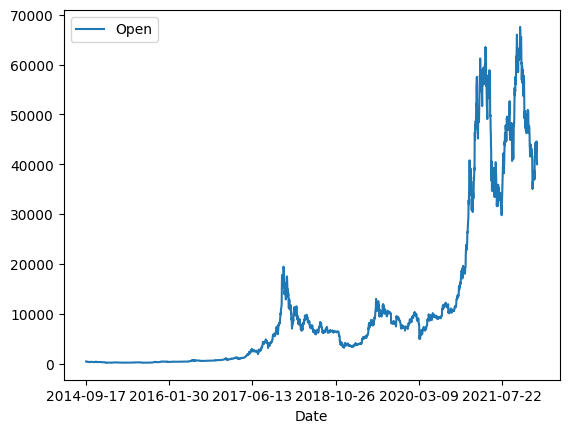

In [7]:
bitcoin.plot(x='Date', y='Open')

<Axes: xlabel='Date'>

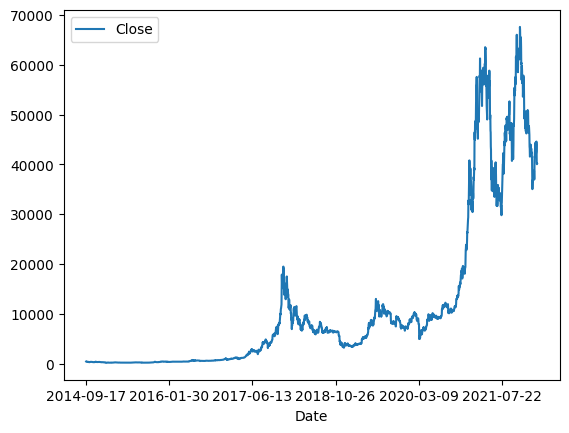

In [8]:
bitcoin.plot(x='Date', y='Close')

<Axes: xlabel='Date'>

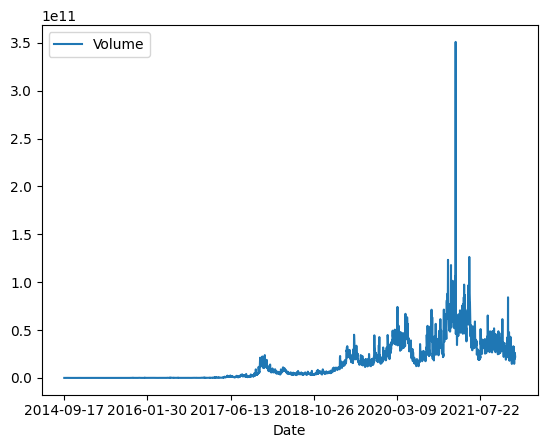

In [9]:
bitcoin.plot(x='Date', y='Volume')

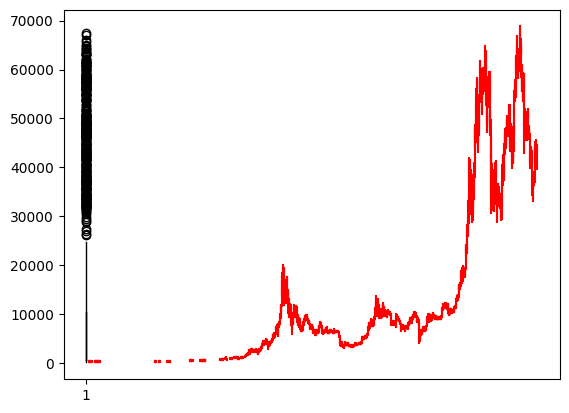

In [10]:
plt.boxplot(bitcoin["Open"])

for i in range(len(bitcoin)):
    plt.plot([bitcoin["Date"][i], bitcoin["Date"][i]], [bitcoin['High'][i], bitcoin['Low'][i]], 'r-')

In [11]:
df = pd.read_csv("Tweets/Bitcoin_tweets.csv")
df.head()

/tmp/ipykernel_2601707/143618950.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Tweets/Bitcoin_tweets.csv")


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False


In [12]:
drop_df = df.dropna(subset=['user_description', 'date', 'text', 'hashtags'])

In [13]:
drop_df.shape

(4153388, 13)

In [14]:
date_list = [x for x in drop_df['date'].values if (':' in x) and ('-' in x)]

In [15]:
date_list = [datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S") for x in date_list]

NameError: name 'datetime' is not defined

In [16]:
import datetime
import tqdm

In [17]:
date_col = []
miss_values = []

for i, date_string in enumerate(tqdm.tqdm(df['date'].values, "Count")):
    try:
        date = datetime.datetime.strptime(date_string, "%Y-%m-%d %H:%M:%S")
        date_col.append(date)

    except:
        miss_values.append(i)

Count:   0%|          | 0/95762468 [00:00<?, ?it/s]

Count: 100%|██████████| 95762468/95762468 [01:23<00:00, 1146216.28it/s]


In [18]:
years = set([(x.year, x.month) for x in date_col])
years

{(2021, 2),
 (2021, 3),
 (2021, 4),
 (2021, 5),
 (2021, 6),
 (2021, 7),
 (2021, 8),
 (2021, 9),
 (2021, 10),
 (2021, 11),
 (2021, 12),
 (2022, 1),
 (2022, 2),
 (2022, 3),
 (2022, 4),
 (2022, 5),
 (2022, 6),
 (2022, 7),
 (2022, 8),
 (2022, 9),
 (2022, 10),
 (2022, 11),
 (2022, 12),
 (2023, 1)}

In [19]:
df = df.drop(miss_values, axis=0)
df.shape

(4689288, 13)

In [20]:
df['date'] = pd.to_datetime(df['date'])

In [32]:
df['year_month_day'] = list(zip(df['date'].dt.year.values, df['date'].dt.month.values, df['date'].dt.day.values))
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,year_month,year_month_day
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False,"(2021, 2)","(2021, 2, 10)"
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False,"(2021, 2)","(2021, 2, 10)"
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False,"(2021, 2)","(2021, 2, 10)"
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False,"(2021, 2)","(2021, 2, 10)"
5,ZerrBenz™ ⚔ ✪ 20732,"Bkk, Thailand",I'm a cat slave 🐱 Interested in Blockchain · T...,2010-01-12 07:00:04,742.0,716,2444,False,2021-02-10 23:53:30,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,"['Crypto', 'Binance', 'Cashback']",Twitter Web App,False,"(2021, 2)","(2021, 2, 10)"


<Axes: xlabel='year_month_day'>

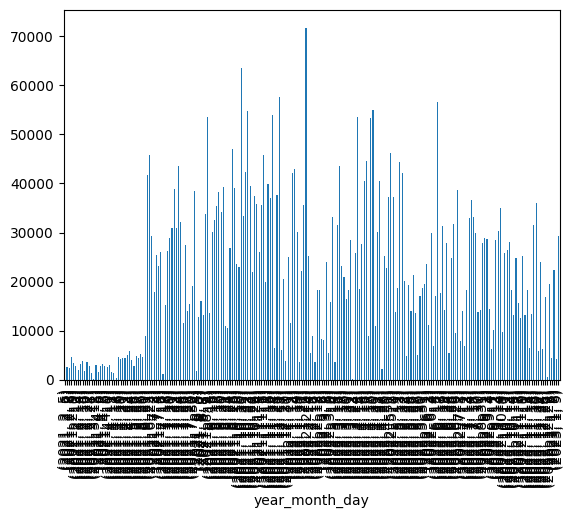

In [34]:
df.groupby('year_month_day').size().plot(kind='bar')

In [24]:
df = df.dropna(subset=['text', 'hashtags'])

<Axes: xlabel='year_month'>

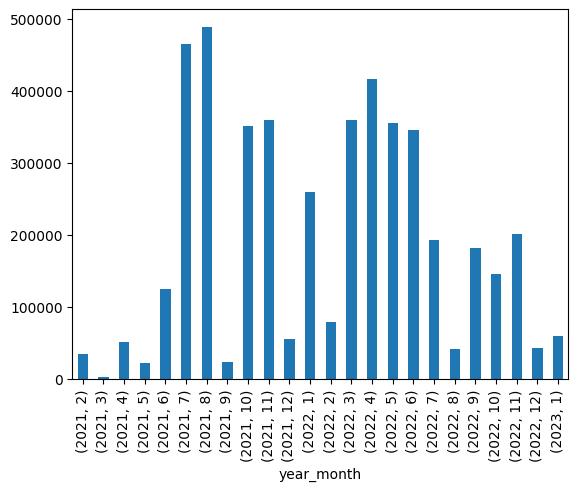

In [25]:
df.groupby('year_month').size().plot(kind='bar')

In [37]:
df.groupby('year_month_day').size().reset_index()

,year_month_day,0
0,"(2021, 2, 5)",1291
1,"(2021, 2, 6)",2491
2,"(2021, 2, 7)",2324
3,"(2021, 2, 8)",4614
4,"(2021, 2, 9)",3434
...,...,...
217,"(2022, 12, 27)",19531
218,"(2023, 1, 6)",4406
219,"(2023, 1, 7)",22338
220,"(2023, 1, 8)",4264


In [ ]:
# Concatenar twits do dia e limitar por número de palavras


In [ ]:
import torch 